In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data = pd.read_csv("stocks.csv")

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,52030,2451,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,87456
1,52031,2452,WHITE METAL LANTERN,7,12-01-2010 08:26,2.55,87457
2,52032,2453,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.55,87458
3,52033,2454,KNITTED UNION FLAG HOT WATER BOTTLE,9,12-01-2010 08:26,2.55,87459
4,52034,2455,RED WOOLLY HOTTIE WHITE HEART.,10,12-01-2010 08:26,2.55,87460


In [18]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
9994,62024,12445,HAND WARMER UNION JACK,1,12-01-2010 08:26,2.55,92451
9995,62025,12446,WHITE HANGING HEART T-LIGHT HOLDER,5,12-01-2010 08:26,2.55,92452
9996,62026,12447,WHITE METAL LANTERN,6,12-01-2010 08:26,2.55,92453
9997,62027,12448,CREAM CUPID HEARTS COAT HANGER,4,12-01-2010 08:26,2.55,92454
9998,62028,12449,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,2.55,87456


In [19]:
data.dtypes

InvoiceNo        int64
StockCode        int64
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
dtype: object

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9999 non-null   int64  
 1   StockCode    9999 non-null   int64  
 2   Description  9974 non-null   object 
 3   Quantity     9999 non-null   int64  
 4   InvoiceDate  9999 non-null   object 
 5   UnitPrice    9999 non-null   float64
 6   CustomerID   9999 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 546.9+ KB


In [21]:
data.corr()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID
InvoiceNo,1.000000,1.000000,0.006343,NaN,0.499550
StockCode,1.000000,1.000000,0.006343,NaN,0.499550
Quantity,0.006343,0.006343,1.000000,NaN,-0.517485
UnitPrice,NaN,NaN,NaN,NaN,NaN
CustomerID,0.499550,0.499550,-0.517485,NaN,1.000000


In [22]:
data.isna().sum()

InvoiceNo       0
StockCode       0
Description    25
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
dtype: int64

In [23]:
data["InvoiceYear"] = pd.to_datetime(data.InvoiceDate).dt.year

In [24]:
data["Total_Price"] = data["Quantity"] * data["UnitPrice"]
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceYear,Total_Price
0,52030,2451,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,87456,2010,15.30
1,52031,2452,WHITE METAL LANTERN,7,12-01-2010 08:26,2.55,87457,2010,17.85
2,52032,2453,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.55,87458,2010,20.40
3,52033,2454,KNITTED UNION FLAG HOT WATER BOTTLE,9,12-01-2010 08:26,2.55,87459,2010,22.95
4,52034,2455,RED WOOLLY HOTTIE WHITE HEART.,10,12-01-2010 08:26,2.55,87460,2010,25.50


In [25]:
data.drop(["Quantity","UnitPrice","InvoiceDate","Description","StockCode","InvoiceNo"],axis = 1, inplace = True)

C:\Users\lvpud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

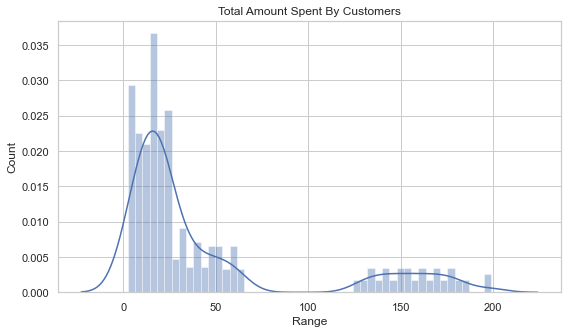

In [26]:
plt.figure(figsize=(9,5))
sns.set(style='whitegrid')
sns.distplot(data["Total_Price"])
plt.title("Total Amount Spent By Customers")
plt.xlabel("Range")
plt.ylabel("Count")

In [29]:
len(data["CustomerID"].unique())

4999

In [30]:
data

,CustomerID,InvoiceYear,Total_Price
0,87456,2010,15.30
1,87457,2010,17.85
2,87458,2010,20.40
3,87459,2010,22.95
4,87460,2010,25.50
...,...,...,...
9994,92451,2010,2.55
9995,92452,2010,12.75
9996,92453,2010,15.30
9997,92454,2010,10.20


In [36]:
data1 = data.groupby(["CustomerID","InvoiceYear"])["Total_Price"].sum().reset_index()

In [37]:
len(data1)

4999

In [51]:
df1=data1[["CustomerID","InvoiceYear","Total_Price"]]


In [52]:
x=df1[["CustomerID","Total_Price"]]

In [53]:
x.head()

,CustomerID,Total_Price
0,87456,40.8
1,87457,30.6
2,87458,35.7
3,87459,40.8
4,87460,45.9


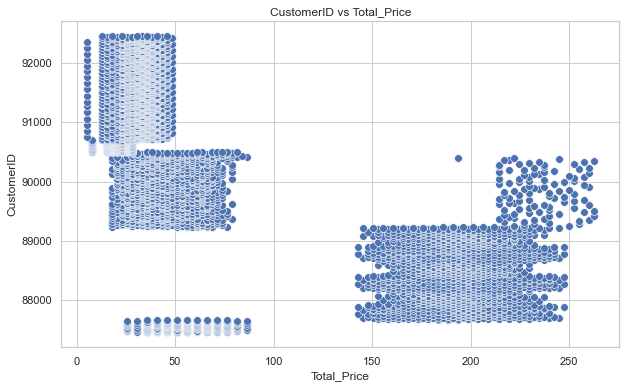

In [54]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Total_Price",y = "CustomerID",  data = x  ,s = 60 )
plt.xlabel('Total_Price')
plt.ylabel('CustomerID') 
plt.title('CustomerID vs Total_Price')
plt.show()

In [55]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [56]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

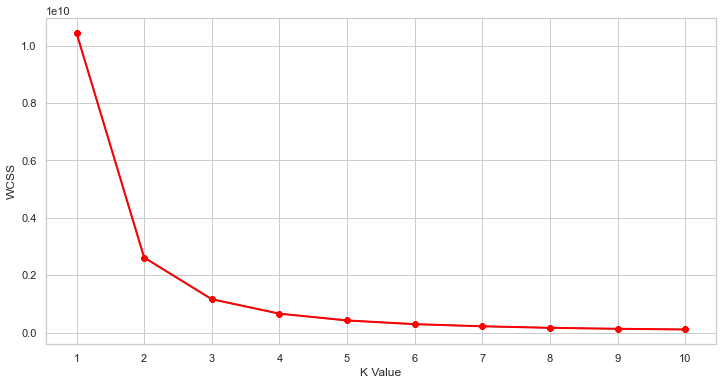

In [57]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [58]:
#Taking 3 clusters
km1=KMeans(n_clusters=3)
#Fitting the input data
km1.fit(x)
#predicting the labels of the input data
y=km1.predict(x)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,InvoiceYear,Total_Price,label
0,87456,2010,40.8,0
1,87457,2010,30.6,0
2,87458,2010,35.7,0
3,87459,2010,40.8,0
4,87460,2010,45.9,0


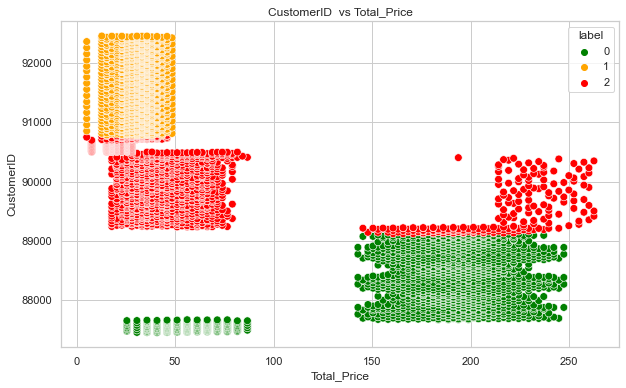

In [59]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Total_Price',y = 'CustomerID',hue="label",  
                 palette=['green','orange','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Total_Price')
plt.ylabel('CustomerID') 
plt.title('CustomerID  vs Total_Price')
plt.show()

In [65]:
cust1=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust1))
print('They are -', cust1["CustomerID"].values)



Number of customer in 3rd group= 1665
They are - [87456 87457 87458 ... 89118 89119 89120]


In [66]:
cust2=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust2))
print('They are -', cust2["CustomerID"].values)


Number of customer in 1st group= 1673
They are - [90782 90783 90784 ... 92452 92453 92454]


In [67]:
cust3=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)


Number of customer in 2nd group= 1661
They are - [89121 89122 89123 ... 90779 90780 90781]
